In [1]:
# IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# LOADING THE DATASET INTO PYTHON ENVIRONMENT

In [5]:
data = pd.read_csv(r"C:\Users\athir\Downloads\car_age_price.csv")

In [6]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [7]:
# inspecting the first 5  rows of the dataframe
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [8]:
# inspecting the last 5  rows of the dataframe
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [9]:
#Getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [10]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [11]:
data.describe

<bound method NDFrame.describe of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [12]:
# Checking the number of rows and columns
data.shape

(112, 2)

In [13]:
## display column labels
data.columns

Index(['Year', 'Price'], dtype='object')

In [14]:
# cHECKING THE DISTRIBUTION OF DATA

In [15]:
data["Price"].value_counts()

550000    20
520000    11
500000    10
450000     6
490000     5
400000     5
600000     4
465000     4
300000     4
425000     3
350000     3
390000     3
525000     3
325000     3
375000     2
475000     2
575000     2
345000     2
320000     2
700000     2
540000     2
640000     1
480000     1
409999     1
396000     1
495000     1
595000     1
341000     1
755000     1
545000     1
486000     1
650000     1
434999     1
509999     1
420000     1
Name: Price, dtype: int64

In [16]:
# CHECKING THE NUMBER  OF MISSING VALUES

In [17]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [18]:
# PLOTTING THE DATAS

C:\Users\athir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


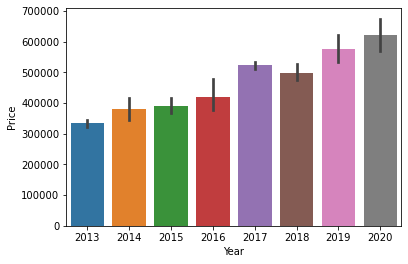

In [19]:
sns.barplot(data["Year"], data["Price"])
plt.show()

C:\Users\athir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


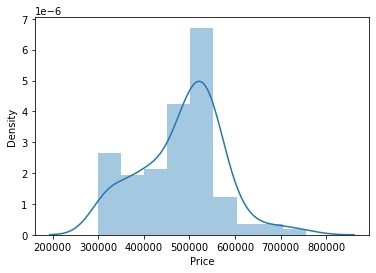

In [20]:
sns.distplot(data['Price'])
plt.show()

[]

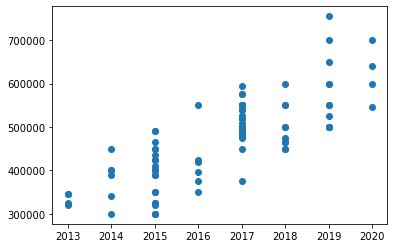

In [21]:
plt.scatter(data.Year,data.Price)
plt.plot()

In [22]:
# CORRELATION

<AxesSubplot:>

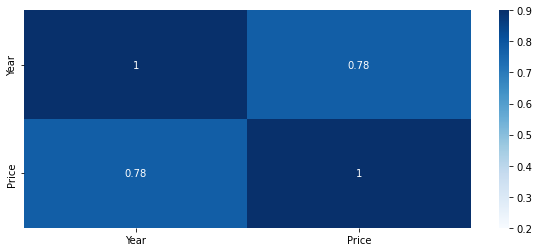

In [23]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=0.2, vmax=0.9, annot=True, cmap="Blues")

# LINEAR REGRESSION

In [24]:
#Store the independent variables into x and dependent variable to y

#Splitting the data in to targets

In [25]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the data into training data and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 42 )

In [27]:
# MODEL TRAINING LINEAR REGRESSION

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
print("Mean squared value :" ,mean_squared_error(y_test ,y_pred) )
print("R squared value :" ,r2_score(y_test, y_pred) )

Mean squared value : 3775807876.045982
R squared value : 0.5099383731153984


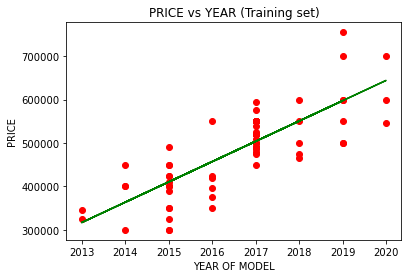

In [32]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_test, lr.predict(x_test), color = "green")
plt.title("PRICE vs YEAR (Training set)")
plt.xlabel("YEAR OF MODEL")
plt.ylabel("PRICE")
plt.show()

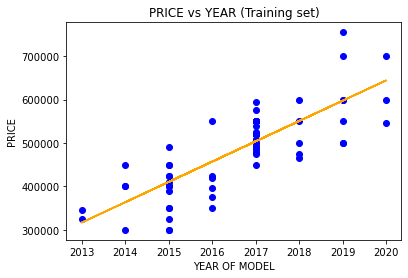

In [33]:
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x_train, lr.predict(x_train), color = "orange")
plt.title("PRICE vs YEAR (Training set)")
plt.xlabel("YEAR OF MODEL")
plt.ylabel("PRICE")
plt.show()

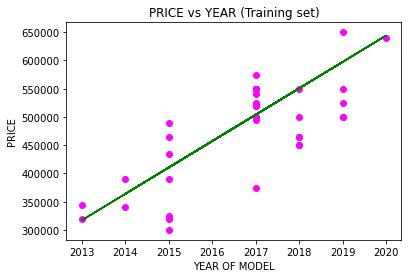

In [34]:
plt.scatter(x_test, y_test, color = "magenta")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("PRICE vs YEAR (Training set)")
plt.xlabel("YEAR OF MODEL")
plt.ylabel("PRICE")
plt.show()


Text(0, 0.5, 'Test Predicated Data')

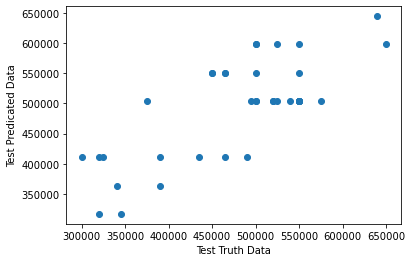

In [35]:
## Assumption of Linear Regression
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicated Data")

In [36]:
## Residuals
residuals = y_test-y_pred

In [37]:
residuals

array([ -72335.23813735,   -8860.12879458,  -85597.68346596,
       -100597.68346596,    -597.68346596, -110385.01945181,
         46139.87120542,  -50597.68346596,  -97335.23813735,
        -47335.23813735,    3090.08989094,   46139.87120542,
         54614.98054819,   -4072.79280873,  -85597.68346596,
        -97335.23813735,   28090.08989094,  -20385.01945181,
       -128860.12879458,   16139.87120542,   46139.87120542,
         -3860.12879458,   46139.87120542,   21139.87120542,
         16139.87120542,   36139.87120542,   24613.98054819,
        -90385.01945181,   26352.53521957,  -85385.01945181,
         -3860.12879458,   52664.76186265, -100597.68346596,
         71139.87120542,   46139.87120542,  -22647.46478043,
         79614.98054819,   46139.87120542])

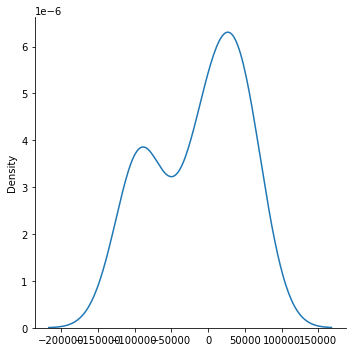

In [38]:
sns.displot(residuals,kind="kde")

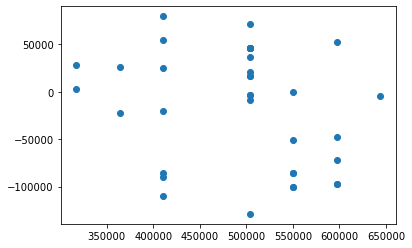

In [39]:
### Scatter plot with predictions and residual

plt.scatter(y_pred, residuals)

# LASSO REGRESSION

1. REDUCE OVERFITTING
2. REDUCE FEATURE / AUTOMATIC FEATURE SELECTION

In [40]:
# import Lasso regression from sklearn library

from sklearn.linear_model import Lasso


In [41]:
#Splitting the data in to targets

In [42]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [43]:
from sklearn.model_selection import train_test_split

# Splitting the data into training data and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  1/3, random_state = 42)

In [44]:
# MODEL TRAINING LINEAR REGRESSION

In [45]:
from sklearn.metrics import mean_squared_error,r2_score

In [46]:
# Train the model
lasso = Lasso(alpha = 1)
model = lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error & R SQuared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set : ", mean_squared_error)
print("R-squared error value :" ,r2_score(y_test, y_pred1) )


Mean squared error on test set :  3775786798.1749773
R-squared error value : 0.5099411088096113


## ACCORDING TO THE VALUES OBTAINED THERE IS A SLIGHT VARIATION IN LINEAR REGRESSION AND LASSO REGRESSION.SO IT IS CONCLUDED THAT LASSO REGRESSION IS BETTER THAN LINEAR REGRESSION.

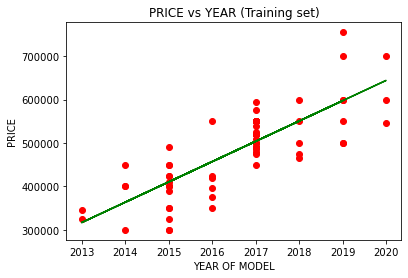

In [47]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_test, lasso.predict(x_test), color = "green")
plt.title("PRICE vs YEAR (Training set)")
plt.xlabel("YEAR OF MODEL")
plt.ylabel("PRICE")
plt.show()

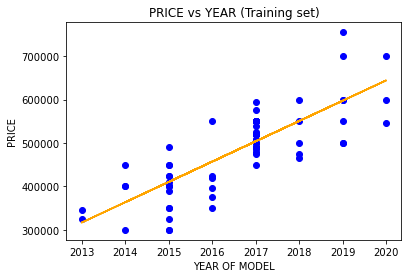

In [48]:
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x_train, lasso.predict(x_train), color = "orange")
plt.title("PRICE vs YEAR (Training set)")
plt.xlabel("YEAR OF MODEL")
plt.ylabel("PRICE")
plt.show()

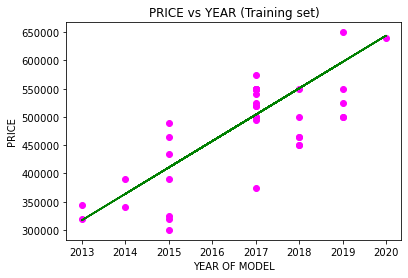

In [49]:
plt.scatter(x_test, y_test, color = "magenta")
plt.plot(x_train, lasso.predict(x_train), color = "green")
plt.title("PRICE vs YEAR (Training set)")
plt.xlabel("YEAR OF MODEL")
plt.ylabel("PRICE")
plt.show()

Text(0, 0.5, 'Test Predicated Data')

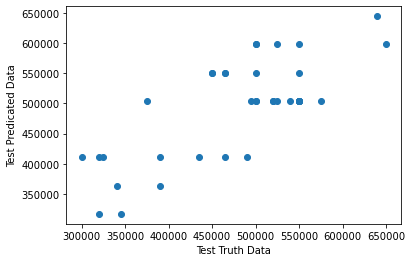

In [50]:
## Assumption of Lasso Regression
plt.scatter(y_test,y_pred1)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicated Data")

In [51]:
#Residual
lasso_residual = y_test - y_pred1

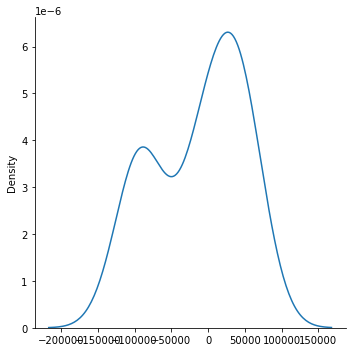

In [52]:
# Displot showing the distribution
sns.displot(lasso_residual, kind="kde")

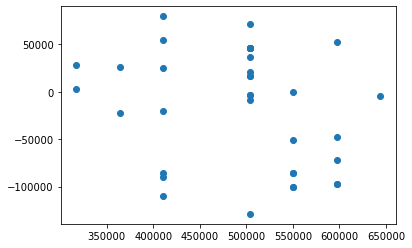

In [53]:
#Scatterplot showing the distribution
plt.scatter(y_pred1, lasso_residual)

# predict the possible price of a 2022 model second-hand grand i10.

In [54]:
lasso.predict([[2022]])

array([737545.73209549])

### This is the forecasted value of YEAR 2022 using lasso regression.